# Assignment 2
## Stochastic and Spatial Models
---
Peterson, Victoria J  
*ID: 15476758* 

Beumer, Wessel T L
*ID: 12640662*

University of Amsterdam  
*Introduction to Computational Science, Block 1, 2024*  

Due: 27 October 2024

---

In [87]:
import numpy as np
from scipy.integrate import odeint 
import networkx as nx
# import ndlib.models.epidemics as ep
import dataclasses
import matplotlib.pyplot as plt

In [80]:
@dataclasses.dataclass
class Results:
    S_List: list[int]
    I_List: list[int]
    R_List: list[int]
    time: list[float]

In [81]:
class Event:
    dX = 0.0
    dY = 0.0
    dZ = 0.0
    rate = 0.0


class Transmission(Event):
    def __init__(self, beta, X, Y, Z, N):
        self.dX = -1
        self.dY = 1
        self.dZ = 0
        self.rate = beta*X*Y/N

class Births(Event):
    def __init__(self, mu, X, Y, Z, N):
        self.dX = 1
        self.dY = 0
        self.dZ = 0
        self.rate = mu*N

class DeathsX(Event):
    def __init__(self, mu, X, Y, Z, N):
        self.dX = -1
        self.dY = 0.0
        self.dZ = 0.0
        self.rate = mu*X

class DeathsY(Event):
    def __init__(self, mu, X, Y, Z, N):
        self.dX = 0.0
        self.dY = -1
        self.dZ = 0.0
        self.rate = mu*Y

class DeathsZ(Event):
    def __init__(self, mu, X, Y, Z, N):
        self.dX = 0.0
        self.dY = 0.0
        self.dZ = -1
        self.rate = mu*Z

class Recovery(Event):
    def __init__(self, gamma, X, Y, Z, N):
        self.dX = 0.0
        self.dY = -1
        self.dZ = 1
        self.rate = gamma*Y

In [82]:
class SIRModel:
    def __init__ (self, X, Y, Z, N, beta, gamma, mu):
        
        self.X = X
        self.Y = Y
        self.Z = Z
        self.N = N
        self.beta = beta
        self.gamma = gamma
        self.mu = mu
        self.results = Results([], [], [], [])

    def calcEvents(self):
        events = []
        events.append(Transmission(self.beta, self.X, self.Y, self.Z, self.N))
        events.append(Births(self.mu, self.X, self.Y, self.Z, self.N))
        events.append(DeathsX(self.mu, self.X, self.Y, self.Z, self.N))
        events.append(DeathsY(self.mu, self.X, self.Y, self.Z, self.N))
        events.append(DeathsZ(self.mu, self.X, self.Y, self.Z, self.N))
        events.append(Recovery(self.gamma, self.X, self.Y, self.Z, self.N))
        return events

    def gillespiesAlgorithm(self):
        events = self.calcEvents()
        rateTotal = sum([i.rate for i in events])

        deltaT = -1/rateTotal * np.log(np.random.rand())

        probabilities = np.random.rand() * rateTotal

        upperRate = 0

        for i in events:
            lowerRate = upperRate
            upperRate += i.rate

            if lowerRate < probabilities <= upperRate:
                return i, deltaT


    def gillespiesSimulation(self, finalTime):
        time = 0

        while time < finalTime:
            event, deltaT = self.gillespiesAlgorithm()
            time += deltaT

            self.X += event.dX
            self.Y += event.dY
            self.Z += event.dZ

            self.results.S_List.append(self.X)
            self.results.I_List.append(self.Y)
            self.results.R_List.append(self.Z)
            self.results.time.append(time)


In [90]:
# Initial Values
X0 = 999  
Y0 = 1
Z0 = 0
N = X0 + Y0 + Z0
beta = 0.5
gamma = 0.1
mu = 0.01

time = 1000


model = SIRModel(X0, Y0, Z0, N, beta, gamma, mu)

model.gillespiesSimulation(time)

for i in range(len(model.results.time)):
    print(model.results.time[i], model.results.S_List[i], model.results.I_List[i], model.results.R_List[i])


0.04227410564991365 1000 1 0
0.0736222830788108 999 1.0 0.0
0.19221441452712812 998 1.0 0.0
0.33987871805660197 999 1.0 0.0
0.4112785488497489 998 1.0 0.0
0.4778911847262766 999 1.0 0.0
0.5269050604201911 998 2.0 0.0
0.5422485526773527 997 2.0 0.0
0.6502063483210769 996 2.0 0.0
0.6833089889653037 997 2.0 0.0
0.7076514887140187 996 2.0 0.0
0.828992392045703 997 2.0 0.0
0.8945684786646646 998 2.0 0.0
0.9559538511998703 997 2.0 0.0
0.9844259647012029 998 2.0 0.0
1.0051851289441576 997 2.0 0.0
1.034946652278088 998 2.0 0.0
1.0496415594646764 997 2.0 0.0
1.057683872298163 996 2.0 0.0
1.0662165778992068 995 2.0 0.0
1.078415781189248 994 2.0 0.0
1.0901177319316795 993 3.0 0.0
1.1869745796313773 992 3.0 0.0
1.2366304732309779 991 3.0 0.0
1.2439632563634986 990 3.0 0.0
1.33491244461867 989 3.0 0.0
1.3533400946913579 990 3.0 0.0
1.4058098269169235 991 3.0 0.0
1.436242934082154 992 3.0 0.0
1.5762157320076806 993 3.0 0.0
1.6078667347067235 994 3.0 0.0
1.611332964882217 995 3.0 0.0
1.62177437024891

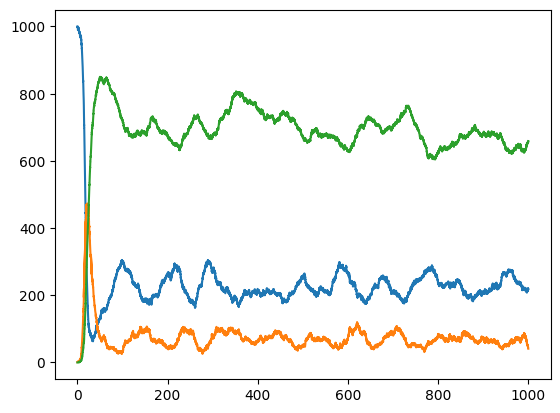

In [91]:
plt.figure()
plt.plot(model.results.time, model.results.S_List, label='S')
plt.plot(model.results.time, model.results.I_List, label='I')
plt.plot(model.results.time, model.results.R_List, label='R')

plt.show()